# 1. Intro 2: Basic Concepts in Julia
`ISE 754, Fall 2024`

## 1. The Julia Environment
After launching Julia, execute `using IJulia` followed by `jupyterlab()` at the command prompt to launch Jupyter in your default browser. Julia has an extensive set of built-in functions as well as additional packages that consist of functions related to more specialized topics. It can be used in two different ways: as a traditional programming environment and as an interactive calculator. In *calculator mode* (running Julia either in Jupyter or at the command prompt), the built-in and package functions provide a convenient means of performing one-off calculations and graphical plotting; in *programming mode*, running Julia in an IDE like Visual Studio Code (VS Code) with Julia extensions, provides a programming environment (editor, debugger, and profiler) that enables the user to write their own functions and scripts.

## 2. Creating Arrays
In Julia, integer and real-valued scalars are distinguished, and vectors and matrices are special 1- and 2-dimensional cases of an _n_-dimensional array:

- Scalar $ n = 1 $ is an `Int64` integer variable
- Scalar $ x = 1. $ is a `Float64` real-valued variable
- Vector $ {\bf{a}} = \left[ {\begin{array}{c} 1\\2\\3 \end{array}} \right] $ is a 3-element `Array{Int64,1}` 1-dimensional integer array
- Matrix $ {\bf{A}} = \left[ {\begin{array}{c}1&2&3&4\\5&6&7&8\end{array}} \right] $ is a `2×4 Array{Int64,2}` 2-dimensional integer array.

Scalar variables and arrays can be created as follows (`#` is used for comments in code, _Markdown_ is used for this comment since it is in a separate non-code cell):

In [3]:
n = 1        # Integer number
typeof(n)

Int64

In [2]:
x = 1.       # Real (or floating point) number

1.0

In [3]:
Int(x)       # Convert real to integer

1

In [4]:
Float64(n)   # Convert integer to real

1.0

In [5]:
a = [1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [6]:
A = [1 2 3 4; 5 6 7 8]

2×4 Matrix{Int64}:
 1  2  3  4
 5  6  7  8

In Julia, the case of a variable matters; e.g., the arrays `a` and `A` are different variables. The last expression in a cell is displayed. To suppress the output, end the expression with a semicolon (`;`):

In [7]:
A = [1 2 3 4; 5 6 7 8];

An empty array is considered a vector of type `Any` (note: since only the last expression in a cell is displayed, the macro `@show` can be used to display an expression that is not the last):

In [8]:
@show a = []
@show typeof(a)
a

a = [] = Any[]
typeof(a) = Vector{Any}


Any[]

The following operators and functions can be used to automatically create basic structured arrays:

In [9]:
a = collect(1:5)
a = [1:5;]          # Note: the ';' is used to indicate that the 5-element array should be generated

5-element Vector{Int64}:
 1
 2
 3
 4
 5

In [10]:
a = [1:5]

1-element Vector{UnitRange{Int64}}:
 1:5

`[1:5]` only creates a 1-element `UnitRange` variable. It is used for iteration and is efficient since `[1:50000000000000]` would also be a 1-element variable, while `[1:50000000000000;]` or `collect(1:50000000000000)` would attempt to create a vector that would likely exceed the RAM on your computer.

In [11]:
@show typeof([1:5;])
@show [1:5]            
typeof(1:5)

typeof([1:5;]) = Vector{Int64}
[1:5] = UnitRange{Int64}[1:5]


UnitRange{Int64}

In [12]:
a = [1:2:5;]

3-element Vector{Int64}:
 1
 3
 5

In [13]:
a = [10:-2:1;]

5-element Vector{Int64}:
 10
  8
  6
  4
  2

In [14]:
a = ones(5)              # Default is floating point

5-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0

In [110]:
a = ones(Int, 5)        # Integer ones

5-element Vector{Int64}:
 1
 1
 1
 1
 1

In [17]:
a = ones(5, 1)         # 5x1 is different from a 5-element array (2-D vs. 1-D)

5×1 Matrix{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0

In [18]:
a = zeros(5)

5-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0

*Array comprehensions* can be used to create custom-valued arrays.

In [19]:
a = [i^2 + i + 1 for i in 0:5]

6-element Vector{Int64}:
  1
  3
  7
 13
 21
 31

The `rand` function generates random numbers between 0 and 1. (Each time it is run, it generates different numbers.)

In [20]:
a = rand(3)

3-element Vector{Float64}:
 0.0029016732080523466
 0.939772531950368
 0.16140671757896563

In [21]:
b = rand(3)

3-element Vector{Float64}:
 0.2739916496461332
 0.12646758295412197
 0.3486956748317406

In [22]:
B = rand(2, 3)

2×3 Matrix{Float64}:
 0.978608   0.643051  0.524561
 0.0569324  0.378742  0.58227

In [23]:
a = rand(1:100, 5)   # Generate 5 random integers between 1 and 100

5-element Vector{Int64}:
 11
 78
 84
 56
 56

A random permutation of the integers 1 to *n* can be generated using the `randperm(n)` function, which is in the `Random` package and `using Random` is used to load it the first time it is called: 

In [24]:
using Random
randperm(5)

5-element Vector{Int64}:
 3
 5
 1
 2
 4

#### List the variables currently in the workspace:

In [25]:
varinfo()

| name |      size | summary                   |
|:---- | ---------:|:------------------------- |
| A    | 104 bytes | 2×4 Matrix{Int64}         |
| B    |  88 bytes | 2×3 Matrix{Float64}       |
| Base |           | Module                    |
| Core |           | Module                    |
| Main |           | Module                    |
| a    |  80 bytes | 5-element Vector{Int64}   |
| b    |  64 bytes | 3-element Vector{Float64} |
| n    |   8 bytes | Int64                     |
| x    |   8 bytes | Float64                   |


Variables cannot be removed from the worspace and, instead, can be set equal to `nothing` to that the memory they were using is freed:

In [26]:
A = nothing
a = nothing
varinfo()

| name |     size | summary                   |
|:---- | --------:|:------------------------- |
| A    |  0 bytes | Nothing                   |
| B    | 88 bytes | 2×3 Matrix{Float64}       |
| Base |          | Module                    |
| Core |          | Module                    |
| Main |          | Module                    |
| a    |  0 bytes | Nothing                   |
| b    | 64 bytes | 3-element Vector{Float64} |
| n    |  8 bytes | Int64                     |
| x    |  8 bytes | Float64                   |


## 3. Selecting Array Elements
In Julia, indices or *index arrays* inside of square brackets are used to select elements of an array.
#### 1-D array:

In [27]:
a = [10:15;]
a[3]            # Select single element

12

In [28]:
a[[2, 4]]        # Select multiple elements

2-element Vector{Int64}:
 11
 13

In [29]:
idx = [2, 4]    # Use index array
a[idx]

2-element Vector{Int64}:
 11
 13

In [30]:
using Random
Random.seed!(1234)    # Set seed to allow replication
x = rand(3)           # Array of random values

3-element Vector{Float64}:
 0.32597672886359486
 0.5490511363155669
 0.21858665481883066

In [31]:
x[1]

0.32597672886359486

In [32]:
Random.seed!(1234)
x = rand(1)           # Want single random value, but returned as 1-element array

1-element Vector{Float64}:
 0.32597672886359486

In [33]:
Random.seed!(1234)
x = rand(1)[]         # Returned as single value

0.32597672886359486

#### 2-D arrays
The colon operator `:` is used to select an entire row or column:

In [34]:
A = [1 2 3 4; 5 6 7 8]
A[:, :]

2×4 Matrix{Int64}:
 1  2  3  4
 5  6  7  8

In [35]:
A[1, 2]        # Select single element

2

In [36]:
A[1, :]        # Select single row

4-element Vector{Int64}:
 1
 2
 3
 4

In [37]:
A[:, 1]        # Select single column

2-element Vector{Int64}:
 1
 5

In [38]:
A[:, [1,3]]    # Select two columns

2×2 Matrix{Int64}:
 1  3
 5  7

The vector $ \left[ {\begin{array}{c} 1,3 \end{array}} \right] $ is an index array, where each element corresponds to a column index number of the original matrix **A**. The keyword `end` can be used to indicate the last row or column:

In [39]:
A[:, end]

2-element Vector{Int64}:
 4
 8

In [40]:
A[:, end-1]

2-element Vector{Int64}:
 3
 7

The selected portion of the one array can be assigned to a new array:

In [41]:
B = A[:, 3:end]

2×2 Matrix{Int64}:
 3  4
 7  8

## 4. Changing an Array
### Change elements of array:
Elements of an array can be changed by selecting a portion of an array as the left-hand-side target of an assignment statement:

In [42]:
a = [1:5;]

5-element Vector{Int64}:
 1
 2
 3
 4
 5

In [43]:
a[2] = 6

6

__Note:__ Just the modified element of `a` is displayed. Type `a` on a second line in the cell to display the modified `a` in full:

In [44]:
a[2] = 6
a

5-element Vector{Int64}:
 1
 6
 3
 4
 5

Assign a value to multiple locations:

In [45]:
a[[1, 3]] = 0    # Error: need to use dot so that assignment is made to multiple elements in array

LoadError: ArgumentError: indexed assignment with a single value to possibly many locations is not supported; perhaps use broadcasting `.=` instead?

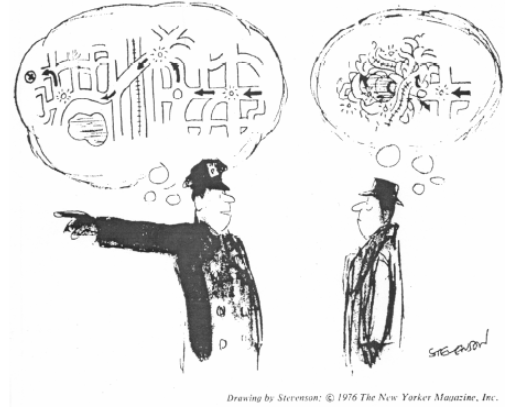

#### Why all the dots?

In [46]:
a[[1, 3]] .= 0    # Note: '.=' is used instead of '=' to assign to mulitple locations
a

5-element Vector{Int64}:
 0
 6
 0
 4
 5

In [47]:
a[[1, 3]] .= [7,8]
a

5-element Vector{Int64}:
 7
 6
 8
 4
 5

In [48]:
A[1, 2] = 100
A

2×4 Matrix{Int64}:
 1  100  3  4
 5    6  7  8

### Delete selected array elements:

In [49]:
a = [1:5;]
deleteat!(a, 3)    # Note: the "!" at end of function name is used to signify that the values of input
a                 #       variables are changed by the function (don't need to assign output)

4-element Vector{Int64}:
 1
 2
 4
 5

In [50]:
deleteat!(a,[1,4])
a

2-element Vector{Int64}:
 2
 4

Delete and return last element:

In [51]:
a = [1:5;]
@show b = pop!(a)
a

b = pop!(a) = 5


4-element Vector{Int64}:
 1
 2
 3
 4

In [52]:
@show b = popfirst!(a)     # Delete and return first element
a

b = popfirst!(a) = 1


3-element Vector{Int64}:
 2
 3
 4

### Insert selected array elements:

In [53]:
@show a = [3:5;]
insert!(a, 2, 8)        # Insert scalar value 8 into array at location 2

a = [3:5;] = [3, 4, 5]


4-element Vector{Int64}:
 3
 8
 4
 5

In [54]:
push!(a, 6)            # Insert 6 at end of array 

5-element Vector{Int64}:
 3
 8
 4
 5
 6

In [55]:
pushfirst!(a, 7)       # Insert 7 at beginning of array

6-element Vector{Int64}:
 7
 3
 8
 4
 5
 6

In [56]:
@show b = [10:12;]
append!(a, b)          # Append another array to end of array 

b = [10:12;] = [10, 11, 12]


9-element Vector{Int64}:
  7
  3
  8
  4
  5
  6
 10
 11
 12

In [57]:
c = ones(3)
append!(a,c)          # Append another array to end of array 

12-element Vector{Int64}:
  7
  3
  8
  4
  5
  6
 10
 11
 12
  1
  1
  1

## 5. Multiplication and Addition
### Scalar and array
A scalar can be added to or multiplied with each element of an array; e.g.,

In [58]:
a = [1:4;]
2 + a                 # Error: '+' used instead of '.+'

LoadError: MethodError: no method matching +(::Int64, ::Vector{Int64})
For element-wise addition, use broadcasting with dot syntax: scalar .+ array

[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4moperators.jl:587[24m[39m
[0m  +(::Real, [91m::Complex{Bool}[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mcomplex.jl:319[24m[39m
[0m  +([91m::Array[39m, ::Array...)
[0m[90m   @[39m [90mBase[39m [90m[4marraymath.jl:12[24m[39m
[0m  ...


In [59]:
2 .+ a        # Note: '.+' is used instead of '+'

4-element Vector{Int64}:
 3
 4
 5
 6

__Broadcasting:__ Automatically expanding a value to have a *compatible size* another; e.g.,

 2 .+ a == [2, 2, 2, 2] + a

In [60]:
[2, 2, 2, 2] + a

4-element Vector{Int64}:
 3
 4
 5
 6

In [61]:
b = 2 * a     # Note: '*' OK for multiplication; reason?, see next cell

4-element Vector{Int64}:
 2
 4
 6
 8

In [62]:
b = 2a        # Don't need '*' if multipying a number and variable

4-element Vector{Int64}:
 2
 4
 6
 8

---
#### __Question 1.2.1__
What is the value of `b`?

    a = [1:3;]
    3 .+ a
    b = 4a

(a) `b = [4, 8, 12]`

(b) `b = [16, 20, 24]`

(c) `b = [12, 24, 36]`

(d) `b = [7, 11, 15]`

---

### Summation
The elements of a single array can be added together using
the `sum` and `cumsum` functions.

In [63]:
@show a = [1:5;]
sum(a)               # (Array summation)

a = [1:5;] = [1, 2, 3, 4, 5]


15

In [64]:
cumsum(a)            # (Cumulative summation)

5-element Vector{Int64}:
  1
  3
  6
 10
 15

By default, Julia sums all the elements in a matrix. To sum each row or column of a matrix, the dimension must be specified:

In [65]:
A = [1 3 4; 5 7 8]
sum(A)               # (Sum entire matrix)

28

In [66]:
sum(A, dims = 1)     # (Sum along columns)

1×3 Matrix{Int64}:
 6  10  12

In [67]:
sum(A, dims = 2)     # (Sum along rows)

2×1 Matrix{Int64}:
  8
 20

# 6. Tuples
Arrays gain much of their utility because they are **mutable**, allowing elements to be easily added or deleted. *Tuples* are similar to arrays except that they are **immutable**: once defined, they can not be changed. This can be useful because it allows Julia to more efficiently process tuples because they're guaranteed not to change.

In [68]:
t = (6, 1, 4)        # 3-tuple

(6, 1, 4)

In [69]:
typeof(t)

Tuple{Int64, Int64, Int64}

In [70]:
t[2]                 # Access second element

1

In [71]:
t[2] = 3             # Can't reassign tuple element (immutable)

LoadError: MethodError: no method matching setindex!(::Tuple{Int64, Int64, Int64}, ::Int64, ::Int64)

In [72]:
pop!(t, 2)           # Can't remove last element (immutable)

LoadError: MethodError: no method matching pop!(::Tuple{Int64, Int64, Int64}, ::Int64)

[0mClosest candidates are:
[0m  pop!([91m::BitSet[39m, ::Integer, [91m::Any[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mbitset.jl:263[24m[39m
[0m  pop!([91m::BitSet[39m, ::Integer)
[0m[90m   @[39m [90mBase[39m [90m[4mbitset.jl:254[24m[39m
[0m  pop!([91m::Base.IdSet[39m, ::Any)
[0m[90m   @[39m [90mBase[39m [90m[4midset.jl:22[24m[39m
[0m  ...


In [73]:
v = collect(t)       # Convert tuple to vector

3-element Vector{Int64}:
 6
 1
 4

In [74]:
v[2] = 3             # Can reassign vector element (mutable)
v

3-element Vector{Int64}:
 6
 3
 4

In [75]:
t = (5)              # Want a 1-tuple but got a scalar
typeof(t)

Int64

In [76]:
t = (5,)             # Got a 1-tuple containing an integer
typeof(t)

Tuple{Int64}

In [77]:
t = (5.0,)             # Got a 1-tuple containing a real (floating point) number)
typeof(t)

Tuple{Float64}

## 7. User-Defined Functions
### Multi-line (named) functions

In [78]:
function fun1(a)
    b = 3a + 1
    println("b = ", b)
    if b % 2 == 0    # Check if c is even
        c = b/2
    else
        c = (b - 1)/2
    end
    return c
end
fun1(5)               # Output returned as Float64

b = 16


8.0

In [79]:
fun1(8.)

b = 25.0


12.0

#### Multiple outputs returned as a tuple

In [80]:
function fun2(a)
    b = 3a + 1
    println("b = ", b)
    if b % 2 == 0    # Check if c is even
        c = b/2
    else
        c = (b - 1)/2
    end
    return b, c
end
fun2(5)               # Output returned as 2-tuple

b = 16


(16, 8.0)

In [81]:
fun2(5)[1]            # Get only the first value        

b = 16


16

In [82]:
fun2(5)[2]           # Get only the second value

b = 16


8.0

### One-line (named) functions

In [83]:
fun3(a) = 3a + 1
fun3(8)

25

### Anonymous (unnamed) functions

In [84]:
x -> 3x + 1

#3 (generic function with 1 method)

In [85]:
map(x -> 3x + 1, 8)           # `map` applies a function (x -> 3x + 1) to a value (8)

25

In [86]:
map(x -> 3x + 1, [8, 3, 7])   # Can also apply to a collection [8, 3, 7]

3-element Vector{Int64}:
 25
 10
 22

In [87]:
[3x + 1 for x in [8, 3, 7]]   # Array comprehension gives same result

3-element Vector{Int64}:
 25
 10
 22

In [88]:
afun = x -> 3x + 1   # Can assign to a variable `afun`

#11 (generic function with 1 method)

In [89]:
afun(8)              # Can now be used like a named function

25

In [90]:
varinfo()            # Still not a named function

| name |     size | summary                               |
|:---- | --------:|:------------------------------------- |
| A    | 88 bytes | 2×3 Matrix{Int64}                     |
| B    | 72 bytes | 2×2 Matrix{Int64}                     |
| Base |          | Module                                |
| Core |          | Module                                |
| Main |          | Module                                |
| a    | 80 bytes | 5-element Vector{Int64}               |
| afun |  0 bytes | #11 (generic function with 1 method)  |
| b    | 72 bytes | 4-element Vector{Int64}               |
| c    | 64 bytes | 3-element Vector{Float64}             |
| fun1 |  0 bytes | fun1 (generic function with 1 method) |
| fun2 |  0 bytes | fun2 (generic function with 1 method) |
| fun3 |  0 bytes | fun3 (generic function with 1 method) |
| idx  | 56 bytes | 2-element Vector{Int64}               |
| n    |  8 bytes | Int64                                 |
| t    |  8 bytes | Tuple{Float64}                        |
| v    | 64 bytes | 3-element Vector{Int64}               |
| x    |  8 bytes | Float64                               |


## 8. Ex: 2-D Euclidean Distance

User-defined functions can be used to extend the capabilities of Julia beyond its basic functions. Although developing a set of functions to solve a particular problem is at the heart of using Julia to program, the easiest way to create a function is to do it in an incremental, scripting manner by writing each line, executing it, and, if it works, and only then copying it into the function.

The best way to start is to create some example data for which you know the correct answer: 

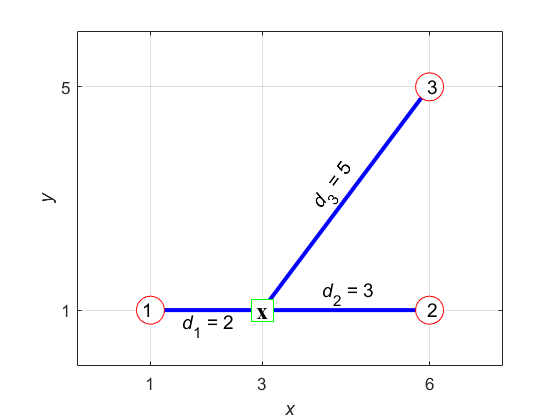

$ d = \sqrt{\left(x_1 - x_2\right)^2 + \left(y_1 - y_2\right)^2}$ 

In [91]:
x1 = (3, 1)        # Using 2-tuple for each 2-D point, could also use 2-vector [3, 1]
x2 = (6, 5)
x1 - x2

LoadError: MethodError: no method matching -(::Tuple{Int64, Int64}, ::Tuple{Int64, Int64})

In [92]:
x1 .- x2

(-3, -4)

In [93]:
(x1 .- x2).^2

(9, 16)

In [94]:
sum((x1 .- x2).^2)

25

In [95]:
sqrt(sum((x1 .- x2).^2))

5.0

In [96]:
d2(x1, x2) = sqrt(sum((x1 .- x2).^2))
d2(x1, x2)

5.0

In [97]:
d2((3, 1, 7), (6, 5, 2))   # Get 3-D for free

7.0710678118654755

In [98]:
d2(3, 6)   # Also get 1-D (for free)

3.0

Calculate distances from *x* to other points stored as an array/vector __pt__ of 2-tuples

In [99]:
pt = [(1, 1), (6, 1), (6, 5)]
x = (3, 1)
[d2(x, i) for i in pt]   # Array comprehension

3-element Vector{Float64}:
 2.0
 3.0
 5.0

In [100]:
[d2(x, i) for i ∈ pt]   # type "\in" followed by TAB to get element of symbol

3-element Vector{Float64}:
 2.0
 3.0
 5.0

Broadcast `d2`:

In [101]:
d2.(x, pt)              # x is a tuple of integers and pt an array of tuples

LoadError: DimensionMismatch: arrays could not be broadcast to a common size; got a dimension with lengths 2 and 3

In [102]:
d2.([x], pt)            # Make x an array of tuples and broadcast function d2

3-element Vector{Float64}:
 2.0
 3.0
 5.0

__1-D points:__

In [103]:
pt = [1, 4, 6]
x = 3
d2(x, pt)               # Why is this "working" in 1-D, put gave error in 2-D?

3.7416573867739413

In [109]:
d2((x, x, x), pt)       # `x` is braodcasted to be a 3-D point

3.7416573867739413

In [105]:
d2.(x, pt)              # Incorrect result, forgot the `.` 

3-element Vector{Float64}:
 2.0
 1.0
 3.0

How can this be prevented?

In [106]:
a, b = 4, 1
a < b ? b - a : a - b   # Ternary operator: condition ? true : false

3

In [107]:
d2(x1, x2) = length(x1) == length(x2) ? sqrt(sum((x1 .- x2).^2)) : error("Inputs not same length.")
d2(x, pt)

LoadError: Inputs not same length.

In [108]:
d2.(x, pt)

3-element Vector{Float64}:
 2.0
 1.0
 3.0

---
#### __Question 1.2.2__
Why is it usually better to represent a two-dimensional point as a 2-tuple, `(x, y)`, than a 2-vector, `[x, y]`?

    (a) Tuples are dynamically sized, which makes them more efficient than vectors for small datasets.

    (b) Since points typically change frequently during processing, a tuple can adapt to these changes more efficiently than a mutable vector.

    (c) Since points do not typically change, they can be immutable, allowing better memory usage since the storage location size for each point will not change.

    (d) Tuples are mutable, allowing for easier modification of the point coordinates.

------
